# Re-plot the figure of exploration of phases

In [9]:
%run -i startup2.py

In [28]:
plt.style.use("/Users/sst/PycharmProjects/bg-mpl-stylesheets/bg_mpl_stylesheet/bg_mpl_stylesheet")

In [11]:
DF = pd.read_csv("data_info.csv", index_col=0)

## Get the data in a matrix

In [12]:
def create_diff_mat():
    # read one phase fitting Rw
    rws0 = []
    samples = ["JBNP31", "JBNP32", "JBNP33L", "JBNP33"]
    phases = ["Anatase", "Rutile", "Brookite", "PbO2a"]
    for sample in samples:
        csv = DF.loc[sample, "csv2"]
        df = pd.read_csv(csv, index_col=0)
        rws0.append(df.loc["Rw", "val"])
    rws0 = np.array(rws0)

    # get a matrix of rw of two phase
    mat = []
    for sample in samples:
        row = []
        for col in ["csv_ana", "csv_rut", "csv_bro", "csv_pbo"]:
            csv = DF.loc[sample, col]
            df = pd.read_csv(csv, index_col=0)
            row.append(df.iloc[0, 0])
        mat.append(row)
    mat = np.array(mat)

    # get a matrix of difference of rw between two phase and one phase
    def sub_col(col: np.array) -> np.array:
        return col - rws0

    diffmat = np.apply_along_axis(sub_col, 0, mat).T
    return diffmat

In [13]:
diffmat = create_diff_mat()

## Bar plot

In [43]:
df = pd.DataFrame(diffmat.T, index=["T160", "T130", "T190L", "T190"], columns=["Anatase", "Rutile", "Brookite", "PbO2a"]).sort_index()
df

,Anatase,Rutile,Brookite,PbO2a
T130,-0.015083,-0.003833,-0.004153,-0.001418
T160,-0.013922,-0.003453,-0.000007,-0.000056
T190,-0.084522,-0.026251,-0.003012,0.019388
T190L,-0.066318,0.012598,-0.001326,0.015122


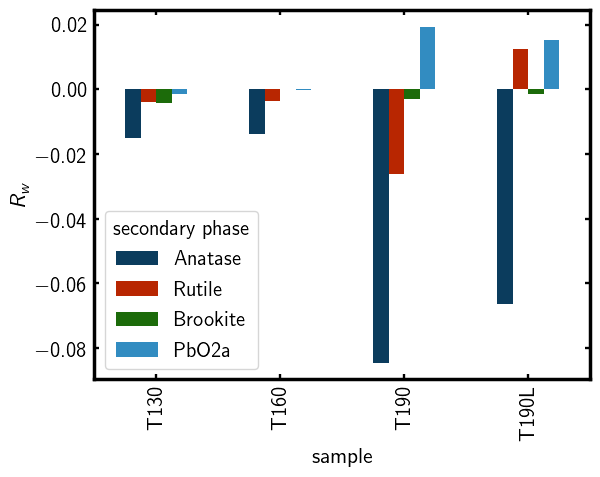

In [48]:
fig, ax = plt.subplots()
df.plot.bar(ax=ax)
ax.set_xlabel("sample")
ax.set_ylabel("$R_w$")
ax.legend(title="secondary phase")
plt.show()
paper_exporter("second_phase_bar_plot.pdf", fig=fig)

## Matrix plot

In [6]:
# plot mat as color
def visualize_diff_mat():
    fig, ax = plt.subplots()
    xticks = ["T160", "T130", "T190L", "T190"]
    yticks = ["Anatase", "Rutile", "Brookite", "PbO2a"]
    img = ax.imshow(diffmat, cmap="seismic", vmin=-.09, vmax=.09)
    ax.set_xticks([-0.5, 0, 1, 2, 3, 3.5])
    xticks = [""] + xticks + [""]
    ax.set_xticklabels(xticks)
    ax.set_yticks([-0.5, 0, 1, 2, 3, 3.5])
    yticks = [""] + yticks + [""]
    ax.set_yticklabels(yticks)
    plt.colorbar(img)

    # add number to pixel
    width, height = diffmat.shape
    for x in range(width):
        for y in range(height):
            val = diffmat[x, y]
            plt.annotate(f"{val:.3f}", xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color= "g" if val <= 0 else "r")
    return fig

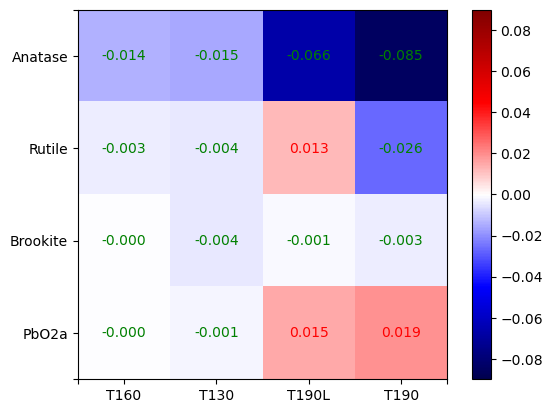

In [7]:
fig = visualize_diff_mat()